# 🗂️ Plan du notebook `01_augmentation.ipynb`

| Étape | Objectif                                                |
| ----- | ------------------------------------------------------- |
| 1     | Chargement des images originales                        |
| 2     | Définition des transformations d’augmentation           |
| 3     | Application des augmentations + Sauvegarde des images augmentées                            |
| 4     | (Optionnel) Visualisation aléatoire d’images augmentées                       |


## 🧪 Étape 1 – Chargement des images

In [1]:
from pathlib import Path
from PIL import Image
import os

# 📁 Répertoires
original_images_dir = Path("../data/raw/Flicker8k_Dataset")
augmented_dir = Path("../data/processed/augmented_images")
augmented_dir.mkdir(parents=True, exist_ok=True)

# 📸 Liste des images
image_paths = list(original_images_dir.glob("*.jpg"))
print(f"Nombre d'images originales : {len(image_paths)}")


Nombre d'images originales : 8091


## 🧰 Étape 2 – Définir les transformations

In [2]:
import torchvision.transforms as transforms

# 🧪 Transfos à appliquer (au choix)
augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
])


## 🔁 Étape 3 – Application + Sauvegarde

In [4]:
from torchvision.transforms import ToTensor, ToPILImage

to_tensor = ToTensor()
to_pil = ToPILImage()

num_aug = 3  # 🔁 Combien d’images augmentées par image originale ?

for img_path in image_paths:
    image = Image.open(img_path).convert("RGB")
    filename = img_path.stem  # sans extension

    for i in range(num_aug):
        augmented_img = augmentation_pipeline(image)
        out_path = augmented_dir / f"{filename}_aug{i}.jpg"
        augmented_img.save(out_path)

print("✅ Augmentations sauvegardées dans :", augmented_dir)


✅ Augmentations sauvegardées dans : ..\data\processed\augmented_images


## 🖼️ Étape 4 – Optionnel : Visualisation

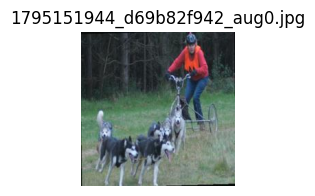

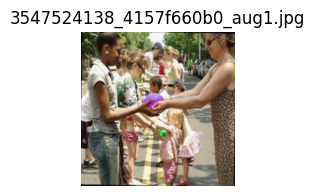

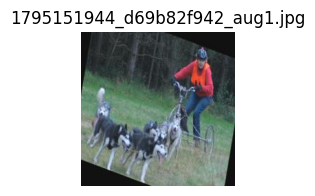

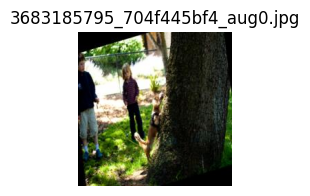

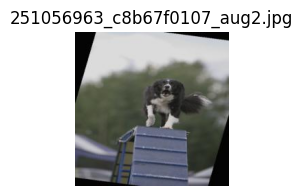

In [5]:
import matplotlib.pyplot as plt
import random

sample_aug = random.sample(list(augmented_dir.glob("*.jpg")), 5)

for path in sample_aug:
    img = Image.open(path)
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.axis("off")
    plt.title(path.name)
    plt.show()
